# PGA TOUR Data Research

## Overview

## Business Problem

## Data Understanding

In [18]:
pd.set_option('display.max_columns', None)

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
years = [str(i) for i in range(2009, 2023)]

In [3]:
for year in years:
    print(year)
    
    # Scoring Statistics, keep rounds from this page as it most accurately reflects total rounds player completed in season.
    scoring = pd.read_html('https://www.pgatour.com/stats/stat.120.y{}.html'.format(year))[1][['PLAYER NAME', 'ROUNDS', 'AVG']]
    # Rename Columns
    scoring = scoring.rename(columns={'AVG':'Scoring_Avg.'})
    
    # Driving Distance
    driving_distance = pd.read_html('https://www.pgatour.com/stats/stat.101.y{}.html'.format(year))[1][['PLAYER NAME', 'AVG.']]
    # Rename Columns
    driving_distance = driving_distance.rename(columns={'AVG.':'Drive_Distance'})
    
    # Scrambling
    scrambling = pd.read_html('https://www.pgatour.com/stats/stat.130.y{}.html'.format(year))[1][['PLAYER NAME', '%']]
    # Rename Columns
    scrambling = scrambling.rename(columns={'%':'Scrambling_%'})
    
    # SG: Tee To Green
    sg_ttg = pd.read_html('https://www.pgatour.com/stats/stat.02674.y{}.html'.format(year))[1][['PLAYER NAME', 'AVERAGE']]
    # Rename Columns
    sg_ttg = sg_ttg.rename(columns={'AVERAGE':'SG_TTG'})
    
    # SG: Off The Tee
    sg_ott = pd.read_html('https://www.pgatour.com/stats/stat.02567.y{}.html'.format(year))[1][['PLAYER NAME', 'AVERAGE']]
    # Rename Columns
    sg_ott = sg_ott.rename(columns={'AVERAGE':'SG_OTT'})
    
    # SG: Approach Shots
    sg_app = pd.read_html('https://www.pgatour.com/stats/stat.02568.y{}.html'.format(year))[1][['PLAYER NAME', 'AVERAGE']]
    # Rename Columns
    sg_app = sg_app.rename(columns={'AVERAGE':'SG_APP'})
    
    # SG: Around The Green
    sg_atg = pd.read_html('https://www.pgatour.com/stats/stat.02569.y{}.html'.format(year))[1][['PLAYER NAME', 'AVERAGE']]
    # Rename Columns
    sg_atg = sg_atg.rename(columns={'AVERAGE':'SG_ATG'})
    
    # SG: Putting
    sg_putt = pd.read_html('https://www.pgatour.com/stats/stat.02564.y{}.html'.format(year))[1][['PLAYER NAME', 'AVERAGE']]
    # Rename Columns
    sg_putt = sg_putt.rename(columns={'AVERAGE':'SG_PUTT'})
    
    # Driving Accuracy Percentage
    driving_accuracy = pd.read_html('https://www.pgatour.com/stats/stat.102.y{}.html'.format(year))[1][['PLAYER NAME', '%']]
    # Rename Columns
    driving_accuracy = driving_accuracy.rename(columns={'%':'Drive_Accuracy'})
    
    # Club Head Speed
    club_head_speed = pd.read_html('https://www.pgatour.com/stats/stat.02401.y{}.html'.format(year))[1][['PLAYER NAME', 'AVG.']]
    # Rename Columns
    club_head_speed = club_head_speed.rename(columns={'AVG.':'CHS (MPH)'})
    
    # Greens In Regulation Percentage
    gir = pd.read_html('https://www.pgatour.com/stats/stat.103.y{}.html'.format(year))[1][['PLAYER NAME', '%']]
    # Rename Columns
    gir = gir.rename(columns={'%':'GIR_%'})
    
    # Going For The Green
    gftg = pd.read_html('https://www.pgatour.com/stats/stat.419.y{}.html'.format(year))[1][['PLAYER NAME', '%']]
    # Rename Columns
    gftg = gftg.rename(columns={'%':'GFTG_%'})
    
    # One-Putt Percentage
    opp = pd.read_html('https://www.pgatour.com/stats/stat.413.y{}.html'.format(year))[1][['PLAYER NAME', '%']]
    # Rename Columns
    opp = opp.rename(columns={'%':'One_Putt_%'})
    
    # Putting - Inside 10'
    p_inside10 = pd.read_html('https://www.pgatour.com/stats/stat.484.y{}.html'.format(year))[1][['PLAYER NAME', '% MADE']]
    # Rename Columns
    p_inside10 = p_inside10.rename(columns={'% MADE':'Inside_10ft_%'})
    
    # 3-Putt Percentage
    three_putt_avoid = pd.read_html('https://www.pgatour.com/stats/stat.426.y{}.html'.format(year))[1][['PLAYER NAME', '%']]
    # Rename Columns
    three_putt_avoid = three_putt_avoid.rename(columns={'%':'3_Putt_%'})
    
    # Par 3 Scoring Average
    par_3 = pd.read_html('https://www.pgatour.com/stats/stat.142.y{}.html'.format(year))[1][['PLAYER NAME', 'AVG']]
    # Rename Columns
    par_3 = par_3.rename(columns={'AVG':'Par_3_Avg.'})
    
    # Par 4 Scoring Average
    par_4 = pd.read_html('https://www.pgatour.com/stats/stat.143.y{}.html'.format(year))[1][['PLAYER NAME', 'AVG']]
    # Rename Columns
    par_4 = par_4.rename(columns={'AVG':'Par_4_Avg.'})
    
    # Par 5 Scoring Average
    par_5 = pd.read_html('https://www.pgatour.com/stats/stat.144.y{}.html'.format(year))[1][['PLAYER NAME', 'AVG']]
    # Rename Columns
    par_5 = par_5.rename(columns={'AVG':'Par_5_Avg.'})
    
    # Get Dataframes into list
    data_frames = [driving_distance, 
                   scrambling, 
                   sg_ttg, 
                   sg_ott, 
                   sg_app, 
                   sg_atg, 
                   sg_putt, 
                   driving_accuracy, 
                   club_head_speed, 
                   gir, 
                   gftg, 
                   opp, 
                   p_inside10, 
                   three_putt_avoid, 
                   par_3, 
                   par_4, 
                   par_5]
    
    # Merge all Dataframes together
    df_merged = pd.DataFrame()
    df_merged = scoring
    for df in data_frames:
        df_merged = pd.merge(df_merged, df, on='PLAYER NAME')
        
    # Only get players who's scoring average isn't null
    df_merged = df_merged.loc[df_merged['Scoring_Avg.'].isnull() == False]
    
    # Add year column
    df_merged['Year'] = year
    
    # Concatenate dataframe to overall dataframe
    if year == '2009':
        df_total = pd.DataFrame()
        df_total = pd.concat([df_total, df_merged], axis=0)
    else:
        df_total = pd.concat([df_total, df_merged], axis=0)

2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022


In [21]:
df_total

,PLAYER NAME,ROUNDS,Scoring_Avg.,Drive_Distance,Scrambling_%,SG_TTG,SG_OTT,SG_APP,SG_ATG,SG_PUTT,Drive_Accuracy,CHS (MPH),GIR_%,GFTG_%,One_Putt_%,Inside_10ft_%,3_Putt_%,Par_3_Avg.,Par_4_Avg.,Par_5_Avg.,Year
0,Tiger Woods,64,68.052,298.4,68.18,2.311,0.335,1.398,0.579,0.877,64.29,120.52,68.46,70.62,41.58,90.44,2.06,2.96,3.97,4.43,2009
1,Steve Stricker,81,69.286,286.1,66.46,1.621,0.275,1.018,0.327,0.207,66.82,111.13,66.67,42.04,42.12,87.54,1.97,3.00,3.99,4.54,2009
2,Jim Furyk,86,69.477,279.9,64.08,0.975,-0.021,0.557,0.439,0.715,69.66,109.41,65.53,38.75,41.16,89.00,1.67,3.05,3.98,4.68,2009
3,Zach Johnson,94,69.601,281.2,62.10,1.165,0.253,0.844,0.068,0.380,71.47,107.57,67.81,45.49,40.04,88.21,2.66,3.01,3.99,4.62,2009
4,Tim Clark,81,69.658,280.1,62.93,0.985,0.125,0.773,0.087,0.276,74.06,106.14,66.95,35.15,41.74,88.04,2.35,3.03,3.98,4.61,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,Dawie van der Walt,64,72.244,297.2,53.96,-0.625,-0.059,-0.211,-0.356,-0.257,59.09,115.97,63.80,41.53,39.07,87.06,4.17,3.07,4.07,4.79,2022
194,Brett Drewitt,58,72.406,295.6,56.57,-1.065,-0.589,-0.606,0.130,-0.453,56.49,114.00,63.99,33.66,37.35,86.82,3.60,3.12,4.10,4.71,2022
195,Joshua Creel,51,72.480,284.1,58.20,-0.913,-0.205,-0.371,-0.337,-0.090,63.88,106.74,60.12,29.65,40.00,87.56,3.09,3.11,4.08,4.81,2022
196,Richy Werenski,65,72.575,294.3,53.88,-1.442,-0.674,-0.579,-0.189,0.123,56.69,111.70,62.43,45.15,41.34,88.82,3.48,3.11,4.10,4.74,2022


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with si

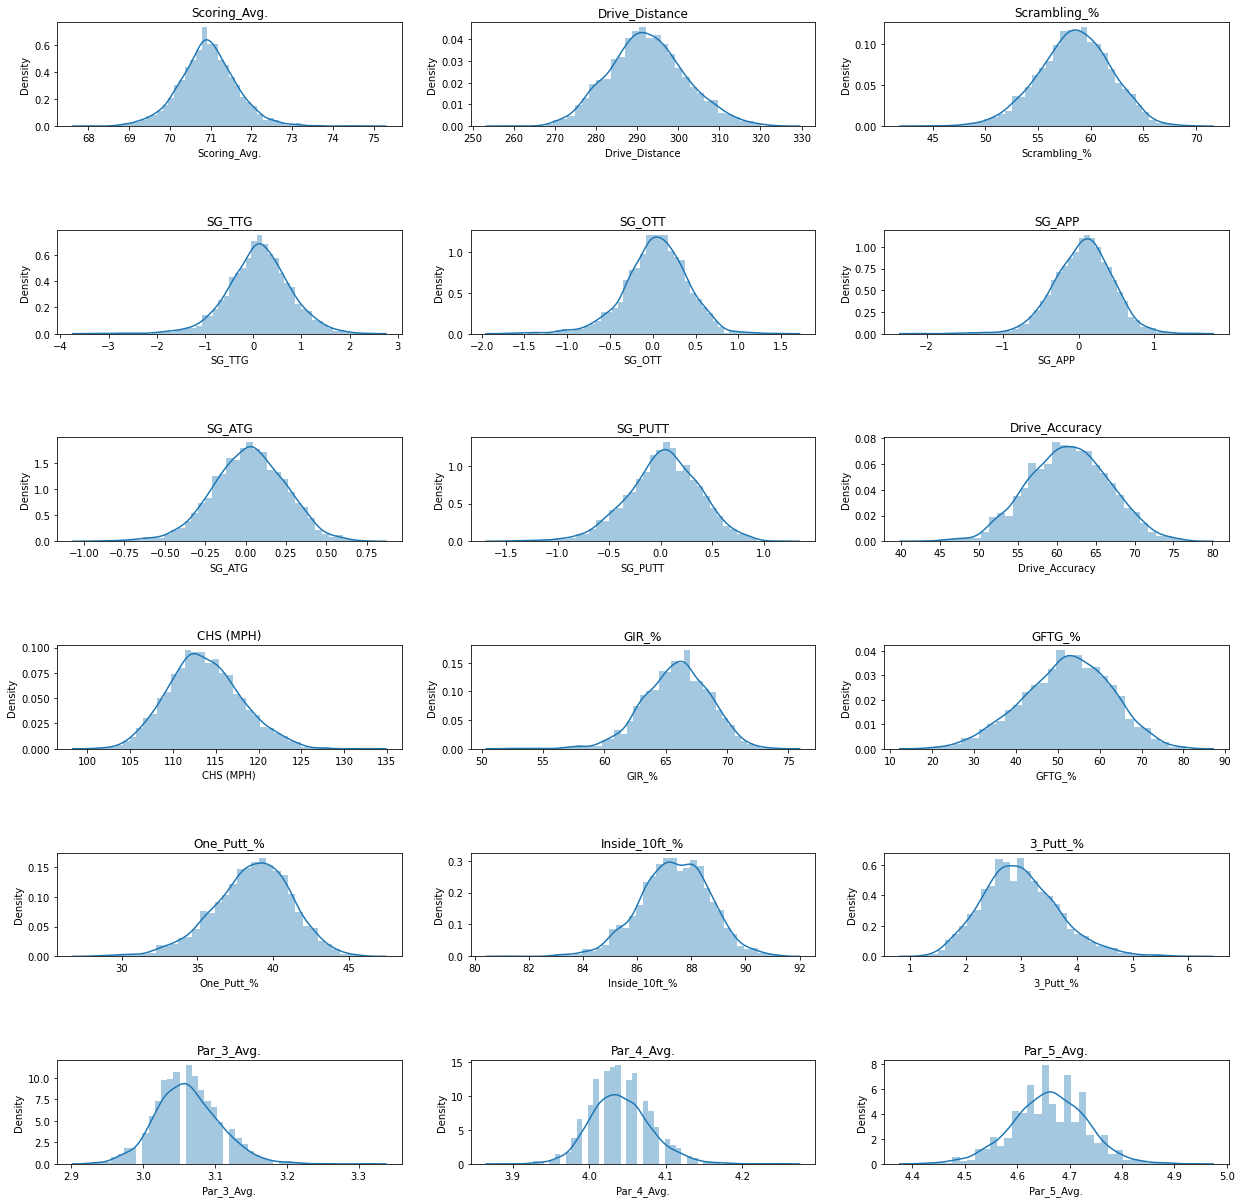

In [32]:
f, ax = plt.subplots(nrows = 6, ncols = 3, figsize=(21,21))
# Selecting columns we want distributions for 
hist_cols = ['Scoring_Avg.', 'Drive_Distance', 'Scrambling_%', 'SG_TTG', 'SG_OTT',
       'SG_APP', 'SG_ATG', 'SG_PUTT', 'Drive_Accuracy', 'CHS (MPH)', 'GIR_%', 'GFTG_%', 'One_Putt_%',
       'Inside_10ft_%', '3_Putt_%', 'Par_3_Avg.',
       'Par_4_Avg.', 'Par_5_Avg.']
row = 0
col = 0

for i, column in enumerate(hist_cols):
    graph = sns.distplot(df_total[column], ax=ax[row][col])
    graph.set(title = column)
    col += 1
    if col == 3:
        col = 0
        row += 1
        
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=1)

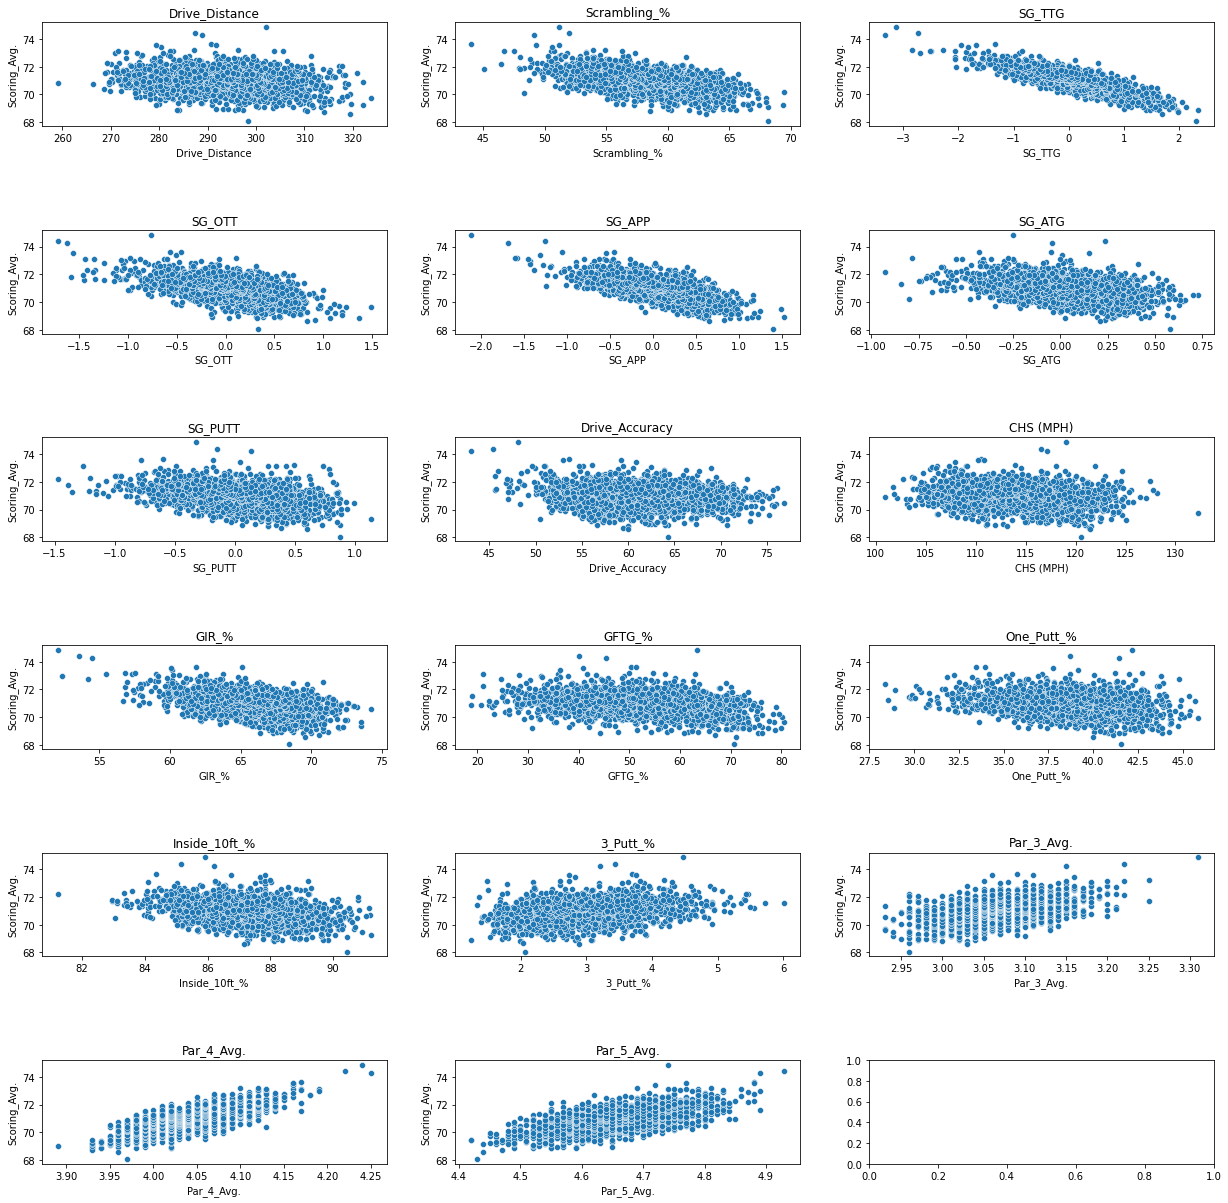

In [38]:
f, ax = plt.subplots(nrows = 6, ncols = 3, figsize=(21,21))
dist_cols = ['Drive_Distance', 'Scrambling_%', 'SG_TTG', 'SG_OTT',
       'SG_APP', 'SG_ATG', 'SG_PUTT', 'Drive_Accuracy', 'CHS (MPH)', 'GIR_%', 'GFTG_%', 'One_Putt_%',
       'Inside_10ft_%', '3_Putt_%', 'Par_3_Avg.',
       'Par_4_Avg.', 'Par_5_Avg.']
row = 0
col = 0
for i, column in enumerate(dist_cols):
    graph = sns.scatterplot(x=column, y="Scoring_Avg.", data=df_total, ax=ax[row][col]);
    graph.set(title = column)
    col += 1
    if col == 3:
        col = 0
        row += 1
        
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=1)

In [52]:
df_total.corr()['Scoring_Avg.'].abs().sort_values(ascending=False)

Scoring_Avg.      1.000000
SG_TTG            0.841588
Par_4_Avg.        0.757317
SG_APP            0.677591
Par_5_Avg.        0.603245
SG_OTT            0.538978
Scrambling_%      0.519489
GIR_%             0.470815
Par_3_Avg.        0.444569
SG_ATG            0.396201
SG_PUTT           0.376623
Inside_10ft_%     0.327321
GFTG_%            0.299535
ROUNDS            0.298462
3_Putt_%          0.297204
One_Putt_%        0.256447
Drive_Distance    0.235377
CHS (MPH)         0.196914
Drive_Accuracy    0.185860
Name: Scoring_Avg., dtype: float64

In [42]:
df_total.sort_values(by='Scoring_Avg.', ascending=True)[['PLAYER NAME', 'Year', 'Scoring_Avg.']][:10]

,PLAYER NAME,Year,Scoring_Avg.
0,Tiger Woods,2009,68.052
0,Rory McIlroy,2022,68.595
0,Dustin Johnson,2018,68.698
0,Rory McIlroy,2014,68.827
0,Jordan Spieth,2017,68.846
0,Luke Donald,2011,68.861
0,Rory McIlroy,2012,68.873
0,Steve Stricker,2013,68.893
1,Tiger Woods,2012,68.904
0,Jordan Spieth,2015,68.938


In [62]:
from sklearn.linear_model import LinearRegression

# features are the predictors or independent variables
scoring_features = df_total[['SG_PUTT', 'SG_ATG', 'SG_APP', 'SG_OTT']]

# the outcome is the result or the dependent variables 
scoring_outcome = df_total['Scoring_Avg.']

# fit (build) the model using the features and the outcome
scoringregression = LinearRegression().fit(scoring_features, scoring_outcome)

# the intercept is where the linear model will cross the y-axis (the expected
# value of y when x is zero)
print('The intercept for the regression model is: ', scoringregression.intercept_.round(2))

print('The coefficients for the features are:')
for x, y in zip(scoring_features.columns, scoringregression.coef_):
  print('\t', x, ':', y.round(2))

The intercept for the regression model is:  71.08
The coefficients for the features are:
	 SG_PUTT : -0.94
	 SG_ATG : -0.94
	 SG_APP : -0.97
	 SG_OTT : -0.96


In [63]:
# R-squared is one measurment of the amount of variance in the outcome that is
# accounted for by the model
print("This model's r-squared is:", scoringregression.score(scoring_features, scoring_outcome).round(2))

This model's r-squared is: 0.92


In [67]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(scoring_features, scoring_outcome, test_size=0.2, random_state=0)
scoring_training_regression = LinearRegression().fit(X_train, y_train)

y_pred = scoring_training_regression.predict(X_test)

scoring_regression_test = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
scoring_regression_test.head()

,Actual,Predicted
74,70.911,70.695470
39,70.320,70.291975
5,69.342,69.544033
38,70.523,70.487430
133,71.222,71.399132


In [68]:
# Create model featuring Strokes Gained: Putting, Strokes Gained: Around the Green, 
# Strokes Gained: Approach, and Strokes Gained: Off the Tee in relation with scoring.
def scoring_model(sg_putt, sg_atg, sg_app, sg_ott):
  prediction = -0.94 * sg_putt + -0.94 * sg_atg + sg_app * -0.97 + sg_ott * -0.96 + 71.08
  return prediction

# Change each features to show effect on scoring average
print("Baseline: ", scoring_model(0,0,0,0))
print("1.0 SG_Putting: ", scoring_model(1,0,0,0))
print("1.0 SG_Around_the_Green", scoring_model(0,1,0,0))
print("1.0 SG_Approach", scoring_model(0,0,1,0))
print("1.0 SG_Off_the_Tee", scoring_model(0,0,0,1))

Baseline:  71.08
1.0 SG_Putting:  70.14
1.0 SG_Around_the_Green 70.14
1.0 SG_Approach 70.11
1.0 SG_Off_the_Tee 70.12


In [73]:
from sklearn.linear_model import LinearRegression

# features are the predictors or independent variables
scoring_features2 = df_total[['Drive_Distance', 'Scrambling_%', 'GIR_%', 'GFTG_%', 'Inside_10ft_%']]

# the outcome is the result or the dependent variables 
scoring_outcome = df_total['Scoring_Avg.']

# fit (build) the model using the features and the outcome
scoringregression = LinearRegression().fit(scoring_features2, scoring_outcome)

# the intercept is where the linear model will cross the y-axis (the expected
# value of y when x is zero)
print('The intercept for the regression model is: ', scoringregression.intercept_.round(2))

print('The coefficients for the features are:')
for x, y in zip(scoring_features2.columns, scoringregression.coef_):
  print('\t', x, ':', y.round(2))

The intercept for the regression model is:  90.88
The coefficients for the features are:
	 Drive_Distance : -0.0
	 Scrambling_% : -0.09
	 GIR_% : -0.09
	 GFTG_% : -0.02
	 Inside_10ft_% : -0.08


In [74]:
# R-squared is one measurment of the amount of variance in the outcome that is
# accounted for by the model
print("This model's r-squared is:", scoringregression.score(scoring_features2, scoring_outcome).round(2))

This model's r-squared is: 0.53


In [75]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(scoring_features2, scoring_outcome, test_size=0.2, random_state=0)
scoring_training_regression = LinearRegression().fit(X_train, y_train)

y_pred = scoring_training_regression.predict(X_test)

scoring_regression_test = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
scoring_regression_test.head()

,Actual,Predicted
74,70.911,70.564796
39,70.320,70.481849
5,69.342,70.468130
38,70.523,71.066047
133,71.222,71.287819


In [77]:
# Create model featuring Driving Distance, Scrambling Percentage, 
# Greens In Regulation Percentage, Going For The Green, Putting - Inside 10'.
def scoring_model2(driving_distance, scrambling, gir, gftg, p_inside10):
  prediction2 = -0.0 * driving_distance + -0.09 * scrambling + gir * -0.09 + gftg * -0.02 + p_inside10 * -0.08 + 90.88
  return prediction2

# Change each features to show effect on scoring average
print("Baseline: ", scoring_model2(0,0,0,0,0))
print("1.0 Drive_Distance: ", scoring_model2(1,0,0,0,0))
print("1.0 Scrambling_%", scoring_model2(0,1,0,0,0))
print("1.0 GIR_%", scoring_model2(0,0,1,0,0))
print("1.0 GFTG_%", scoring_model2(0,0,0,1,0))
print("1.0 Inside_10ft_%", scoring_model2(0,0,0,0,1))

Baseline:  90.88
1.0 Drive_Distance:  90.88
1.0 Scrambling_% 90.78999999999999
1.0 GIR_% 90.78999999999999
1.0 GFTG_% 90.86
1.0 Inside_10ft_% 90.8


In [84]:
df_total.corr()['Scoring_Avg.'].abs().sort_values(ascending=False)

Scoring_Avg.      1.000000
SG_TTG            0.841588
Par_4_Avg.        0.757317
SG_APP            0.677591
Par_5_Avg.        0.603245
SG_OTT            0.538978
Scrambling_%      0.519489
GIR_%             0.470815
Par_3_Avg.        0.444569
SG_ATG            0.396201
SG_PUTT           0.376623
Inside_10ft_%     0.327321
GFTG_%            0.299535
ROUNDS            0.298462
3_Putt_%          0.297204
One_Putt_%        0.256447
Drive_Distance    0.235377
CHS (MPH)         0.196914
Drive_Accuracy    0.185860
Name: Scoring_Avg., dtype: float64

In [82]:
df_recent = df_total.loc[df_total['Year'] == '2022']

In [92]:
df_recent.corr()['Scoring_Avg.'].abs().sort_values(ascending=False)

Scoring_Avg.      1.000000
SG_TTG            0.871312
Par_4_Avg.        0.814650
SG_APP            0.702967
Par_5_Avg.        0.656435
Scrambling_%      0.570786
SG_OTT            0.564934
GIR_%             0.539238
Par_3_Avg.        0.488993
SG_ATG            0.473195
GFTG_%            0.444031
SG_PUTT           0.399222
Drive_Distance    0.275298
Inside_10ft_%     0.259752
One_Putt_%        0.196874
Drive_Accuracy    0.194104
ROUNDS            0.165811
CHS (MPH)         0.158691
3_Putt_%          0.142883
Name: Scoring_Avg., dtype: float64